# (A1.5 Solución de problemas)         
                                                                                                       
                                                                            Fernando Ariel Lozano Castillo


## Índice de Jupyter
<a id='indi' ></a>

[Problema 1 Variables Cuantitativas](#Cuanti) <br>
[Problema 2 Outliers](#outis)<br>
[Problema 3 Colinealidad](#coli) <br>
[Problema 4 Interraciones](#inter) <br>
[Conclusión ](#concu) <br>

***


1. Primero importaremos los datos del archivo **Calificaciones.csv**  en la variable `df` e imprimemos el tipo de dato de cada variable del data frame con la función `dtypes` para checar si existen variables categóricas, además de las 5 primeras filas para checar las variables existentes.

In [3]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("Calificaciones.csv")
display(df.head(5))
# Imprime el tipo de datos con que se cuenta
print(df.dtypes)


,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10


Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object


<a id='Cuanti' ></a>
## Problema 1.- Variables cuantitativas

[Regreso al índice ](#indi) 

2. Podemos observar que existen categóricas, entonces las transformaremos en nuevos datos útiles mediante la función `get_dummies` de pandas junto con el término `drop_first=True` para hacer $l-1$ variables, donde $l$ es la cantidad de niveles de la variable categórica.  

In [6]:
# Transformar las variables categóricas utilizando One-Hot Encoding
df = pd.get_dummies(df, columns=['Escuela', 'Sexo', 'Internet', 'HorasDeEstudio'], drop_first=True)

Ahora imprimimos las primeras 5 observaciones de la base de datos modificada, demostrando así, que las variables cualitativas han desaparecido y fueron reemplazadas por variables adecuadas.

In [8]:
# Imprimir las primeras 5 observaciones para verificar
display(df.head(15))

# Imprimir los tipos de datos de cada columna para verificar la transformación
print(df.dtypes)

,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
0,18,0,6,5,6,6,False,False,False,True,False,False
1,17,0,4,5,5,6,False,False,True,True,False,False
2,15,3,10,7,8,10,False,False,True,True,False,False
3,15,0,2,15,14,15,False,False,True,False,True,False
4,16,0,4,6,10,10,False,False,False,True,False,False
5,16,0,10,15,15,15,False,True,True,True,False,False
6,16,0,0,12,12,11,False,True,True,True,False,False
7,17,0,6,6,5,6,False,False,False,True,False,False
8,15,0,0,16,18,19,False,True,True,True,False,False
9,15,0,0,14,15,15,False,True,True,True,False,False


Edad                int64
Reprobadas          int64
Faltas              int64
G1                  int64
G2                  int64
G3                  int64
Escuela_MS           bool
Sexo_M               bool
Internet_yes         bool
HorasDeEstudio_2     bool
HorasDeEstudio_3     bool
HorasDeEstudio_4     bool
dtype: object


<a id='outis' ></a>
## Problema 2.-  Outliers

[Regreso al índice ](#indi) 

3. Ahora identificaremos valores atípicos para la variable `Faltas`, utilizando el método de Tukey con **k=3**. Imprimimos después toda las observaciones que se consideran atípicas.

In [11]:
# Importar numpy
import numpy as np

In [12]:
# Cuartil uno
q1=df.Faltas.quantile(0.25)
# Cuartil tres
q3=df.Faltas.quantile(0.75)
# Rango intercuartil
iqr=q3-q1
# Límite inferior
li=q1-(3*iqr)
# Límite superior
ls=q3+(3*iqr)
# Observaciones fuera de cualquiera de los dos límites
out=np.where((df.Faltas<li)|(df.Faltas>=ls))[0]
# Imprimir información de outliers
print("Datos de los outliers")
display(df.iloc[out,:])

Datos de los outliers


,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
74,16,0,54,11,12,11,False,False,True,True,False,False
183,17,0,56,9,9,8,False,False,True,True,False,False
276,18,0,75,10,9,9,False,False,True,True,False,False
307,19,1,38,8,9,8,False,True,True,False,False,False
315,19,1,40,13,11,11,False,False,True,False,True,False


Para **determinar si es correcto eliminar** algunas observaciones en función de la variable **"Faltas"**, primero se realizó un **análisis gráfico**. Utilizando un gráfico de barras, se visualizó la distribución de las faltas entre los estudiantes. Este enfoque nos permitió observar si había muchos estudiantes con un número determinado de faltas o si algunos valores eran casos aislados. Si los valores atípicos representaban solo unas pocas observaciones, se  eliminaran; sin embargo, si el número de estudiantes en ese rango era considerable, se mantendrán.



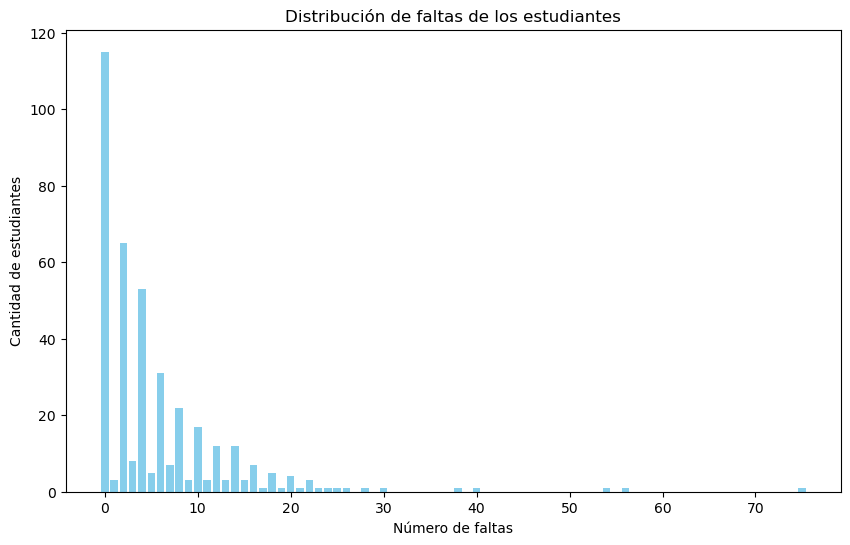

In [14]:

import matplotlib.pyplot as plt

# Contar las ocurrencias de cada valor en la columna 'Faltas'
faltas_counts = df.Faltas.value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(faltas_counts.index, faltas_counts.values, color='skyblue')

# Etiquetas y título
plt.xlabel('Número de faltas')
plt.ylabel('Cantidad de estudiantes')
plt.title('Distribución de faltas de los estudiantes')

# Mostrar la gráfica
plt.show()

En la gráfica se muestra que los 5 outliners serán eliminados, ya que se nota demasiada distancia con respecto a la más cerca que está sobre el número 30, además que no solo fue una observación por cada outliner.

In [16]:

print("Dimensiones antes de eliminar a los outliners:", df.shape , "\n")
# Eliminar outliers
df = df[~df.index.isin(out)]

print("Dimensiones despues de la eliminación:", df.shape , "\n")

Dimensiones antes de eliminar a los outliners: (395, 12) 

Dimensiones despues de la eliminación: (390, 12) 



<a id='coli' ></a>
## Problema 3.- Colinealidad

[Regreso al índice ](#indi) 

4. Primero, generamos una matriz de correlación para identificar posibles problemas de colinealidad entre las variables. Para evitar que la diagonal principal (que siempre tendrá un valor de 1) interfiera en el análisis, utilizamos la función `fill_diagonal` de Numpy para reemplazar esos valores por 0.

Luego, identificamos el par de variables con la correlación más alta utilizando `argmax` para encontrar la posición del valor máximo, y `unravel_index` para obtener los índices **'x,y'** del valor máximo.

Para facilitar la interpretación de la matriz de correlación, generamos un **heatmap** con la librería Seaborn, lo que nos permite visualizar los valores de manera más clara, mostrando las correlaciones más altas en colores más intensos.

Finalmente, si encontramos variables con alta colinealidad, se eliminan aquellas que no aportan información relevante para el modelo, justificando la decisión con base en el análisis visual de la correlación y el **heatmap**.

4 5
0.9047966735871248


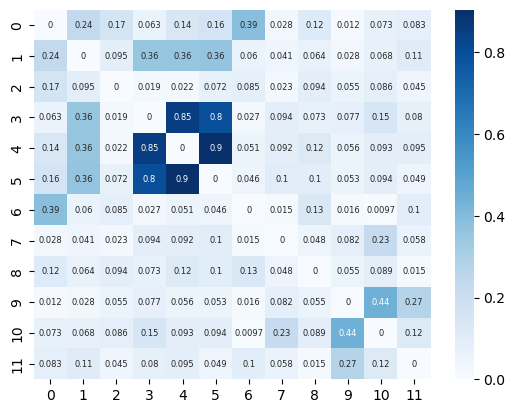

In [18]:
# Obtener valor absoluto de matriz de correlación
cor = df.corr().abs().values

# Llenar la diagnoal con ceros
np.fill_diagonal(cor,0)
# Obtener los índices (i,j) de la posición del valor máximo
i,j=np.unravel_index(cor.argmax(),cor.shape)
# Imprimir los índices
print(i,j)
# Imprimir el valor de la correlación máxima
print(cor[i,j])
# Importar función heatmap de la librería seaborn
from seaborn import heatmap
import matplotlib.pyplot as plt  

heatmap(cor, annot=True, annot_kws={"size": 6}, cmap="Blues")  
plt.show()


In [19]:
df.head()

,Edad,Reprobadas,Faltas,G1,G2,G3,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
0,18,0,6,5,6,6,False,False,False,True,False,False
1,17,0,4,5,5,6,False,False,True,True,False,False
2,15,3,10,7,8,10,False,False,True,True,False,False
3,15,0,2,15,14,15,False,False,True,False,True,False
4,16,0,4,6,10,10,False,False,False,True,False,False


La correlación existe con G2 Y G3, sin embargo, porque más adelante será necesario G3 para predecir calificación final, esta variable no se eliminara, sin embargo, G2 sí, ya que también tiene mucha correlación con G1, y ocupamos evitar colinealidad entonces con la función `drop` eliminamos G2.

In [21]:
# Eliminar  variable
df = df.drop(["G2"], axis = 1)
# Imprimir resumen del data frame
display(df.head())

,Edad,Reprobadas,Faltas,G1,G3,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
0,18,0,6,5,6,False,False,False,True,False,False
1,17,0,4,5,6,False,False,True,True,False,False
2,15,3,10,7,10,False,False,True,True,False,False
3,15,0,2,15,15,False,False,True,False,True,False
4,16,0,4,6,10,False,False,False,True,False,False


<a id='inter' ></a>
## Problema 4.- Interacciones

[Regreso al índice ](#indi) 

5.   Ahora es momento de trabajar con el último de los 4 problemas, las interacciones. 
Pero, antes de empezar a resolver ese problema, necesitamos dividir nuestros datos en X e Y,
pues no queremos generar interacciones con nuestra variable de salida, solo con las variables de entrada.

Ya que realizaremos dicha separación, vale la pena aprovechar y de una vez realizar la 
separación de los datos en entrenamiento y prueba. Seguiremos la misma metodología que 
hemos manejado previamente, usando la función `train_test_split` de sklearn.model_selection,
para generar `X_train`, `X_test`, `Y_train`, y `Y_test`, definiendo la separación entrenamiento/prueba con una proporción 0.8/0.2. Al final, 
imprimiremos en consola las dimensiones de cada uno de los nuevos objetos, para asegurarnos de que todo está bien.<br><br>

In [23]:
# Importar función
from sklearn.model_selection import train_test_split
# Generar subconjuntos de prueba y entrenamiento para X e Y
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("G3", axis=1), df.G3, train_size=0.8, random_state=42)
# Imprimir tamaño de nuevos objetos
print("Xtrain: ",X_train.shape)
print("XTest: ",X_test.shape)
print("Ytrain: ",Y_train.shape)
print("Ytest: ",Y_test.shape)

Xtrain:  (312, 10)
XTest:  (78, 10)
Ytrain:  (312,)
Ytest:  (78,)


5. Incluimos términos de interacción de almenos dos pares de variables e imprimimos las  primeras 5 observaciones de la base datos con los nuevos términos.

In [25]:
X_train.insert(2,"Internet G1",X_train.Internet_yes*X_train.G1)
X_test.insert(2,"Internet G1",X_test.Internet_yes*X_test.G1)


X_train.insert(4,"Faltas Sexo_M",X_train.Faltas*X_train.Sexo_M)
X_test.insert(4,"Faltas Sexo_M",X_test.Faltas*X_test.Sexo_M)


display("Xtrain ",X_train.head())
display("Xtest ",X_test.head())

'Xtrain '

,Edad,Reprobadas,Internet G1,Faltas,Faltas Sexo_M,G1,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
294,18,0,14,8,8,14,False,True,True,False,True,False
63,16,0,10,2,0,10,False,False,True,False,True,False
241,17,0,10,2,2,10,False,True,True,True,False,False
358,18,0,10,4,4,10,True,True,True,False,False,False
221,17,1,0,0,0,6,False,False,False,False,True,False


'Xtest '

,Edad,Reprobadas,Internet G1,Faltas,Faltas Sexo_M,G1,Escuela_MS,Sexo_M,Internet_yes,HorasDeEstudio_2,HorasDeEstudio_3,HorasDeEstudio_4
9,15,0,14,0,0,14,False,True,True,True,False,False
42,15,0,19,2,2,19,False,True,True,True,False,False
33,15,0,8,0,0,8,False,True,True,True,False,False
316,18,0,8,0,0,8,False,False,True,True,False,False
274,17,0,10,2,0,10,False,False,True,True,False,False


6. Ahora entrenaremos el modelo de regresión lineal múltiple con los datos de entrenamiento, prediciendo así la calificación final, después generamos una gráfica de dispersión de las calificaciones finales reales contra las calificaciones finales estimadas por el modelo en los datos de prueba. 

1. Primero convertimos las columnas de tipo `bool` a  `int`(0,1) y verificamos que los datos ahora si son numéricos.

In [28]:
# Convertir las columnas de tipo 'bool' a 'int' (0 y 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)

# Verificar que los datos ahora sean numéricos
print(X_train.dtypes)

Edad                int32
Reprobadas          int32
Internet G1         int32
Faltas              int32
Faltas Sexo_M       int32
G1                  int32
Escuela_MS          int32
Sexo_M              int32
Internet_yes        int32
HorasDeEstudio_2    int32
HorasDeEstudio_3    int32
HorasDeEstudio_4    int32
dtype: object


2. Ahora usamos la función `OLS` de la librería statsmodels.api para logralo, 
entrenando al modelo con la función `fit` usando solamente los datos de entrenamiento. 
Al final, 
imprimiremos un resumen de los resultados con el atributo `summary()`.<br><br>

In [30]:
# Importar la librería
import statsmodels.api as sm
# Generar el modelo
model = sm.OLS(Y_train,sm.add_constant(X_train))
# Entrenar el modelo
results = model.fit()
# Imprimir resultados del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     51.76
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.03e-65
Time:                        01:15:34   Log-Likelihood:                -744.76
No. Observations:                 312   AIC:                             1516.
Df Residuals:                     299   BIC:                             1564.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.1108      2.561  

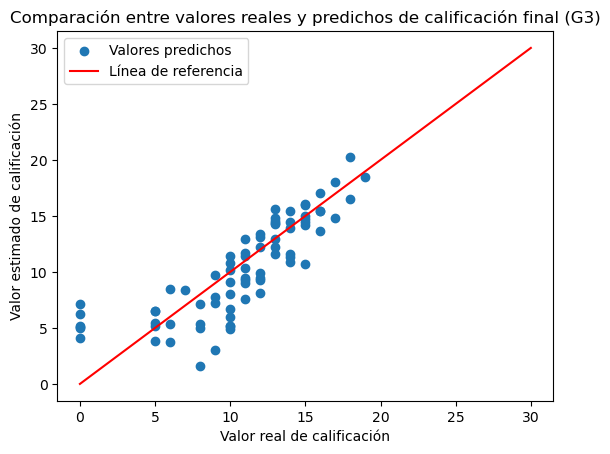

In [31]:
# Predecir peso de observaciones de prueba
yHat = results.predict(sm.add_constant(X_test))

# Importar librerías necesarias
import matplotlib.pyplot as plt

# Generar gráfica de dispersión
plt.scatter(Y_test, yHat, label='Valores predichos')

# Agregar línea roja de referencia
plt.plot([0, 30], [0, 30], color="red", label='Línea de referencia')

# Añadir títulos y etiquetas
plt.title('Comparación entre valores reales y predichos de calificación final (G3)')
plt.xlabel('Valor real de calificación')
plt.ylabel('Valor estimado de calificación')
plt.legend()

# Mostrar la gráfica
plt.show()

<a id='concu' ></a>

### Conclusión

El modelo tiene un buen ajuste con un **R² de 0.675**, lo que sugiere que más de la mitad de la variabilidad en los datos es explicada por las variables en el modelo.

Variables como **Edad**, **Reprobadas**, **Faltas**, **G1** y **Escuela_MS** son **significativas**, ya que tienen p-values bajos (< 0.05), lo que indica que son importantes para predecir la calificación final (G3).

Algunas otras variables, como **Sexo_M**, **Internet_yes** y **HorasDeEstudio**, no son tan significativas, por lo que podrían no ser necesarias para el modelo o requerir más análisis. Además, se podrían utilizar metodologías como **selección hacia adelante** o **hacia atrás** para eliminar las variables menos significativas y, con ello, mejorar el valor de **R²**.


**Firma de honor** :  Doy mi palabra que he realizado esta actividad con integridad académica

[Regreso al índice ](#indi) 